In [1]:

%pip install xgboost scikit-learn pandas

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.0 MB/s eta 0:01:59
   ---------------------------------------- 0.8/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 1.0/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 1.3/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 1.3/124.9 MB 1.1 MB/s eta 0:01:55
    --------------------------------------- 1.6/124.9 MB 1.0 MB/s eta 0:02:03
    --------------------------------------- 1.6/124.9 MB 1.0 MB/s eta 0:02:03
    --------------------------------------- 1.8/124.9 MB 923.6 kB/s eta 0:02:14
    --------------------------------------- 2.1/124.9 MB 903.5 kB/s eta 0:02:16
    --------------------------------------- 2.1/124.9 MB 903.5 kB/s eta 0:02:16
 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import xgboost as xgb

In [4]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [6]:
# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\lenovo\AppData\Local\Temp\ipykernel_17448\1933537738.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


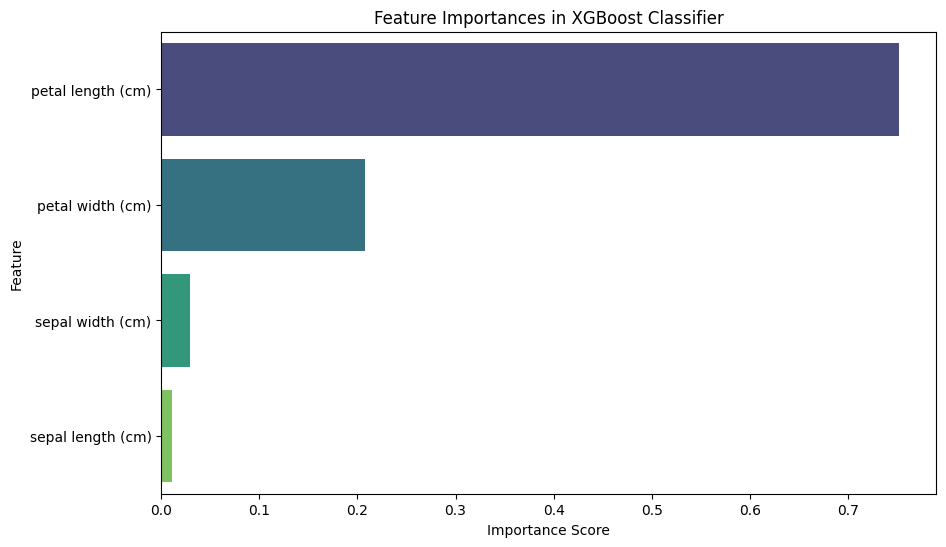

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve feature importances
feature_importances = xgb_clf.feature_importances_
features = iris.feature_names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in XGBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

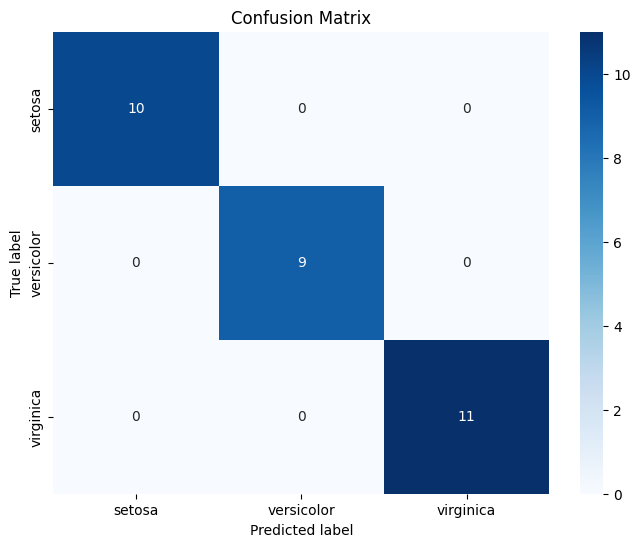

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()